# Descriptive Analysis

In this script, we will analyse infomation provided by the fires 2019-2022 London data set to establish the prevalence of:

- Real vs fake call outs
- Neccessity of special services (i.e. lift release)
- Fires by property type

In [ ]:
# Import libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_theme(context="notebook", style="darkgrid", palette = "flare")

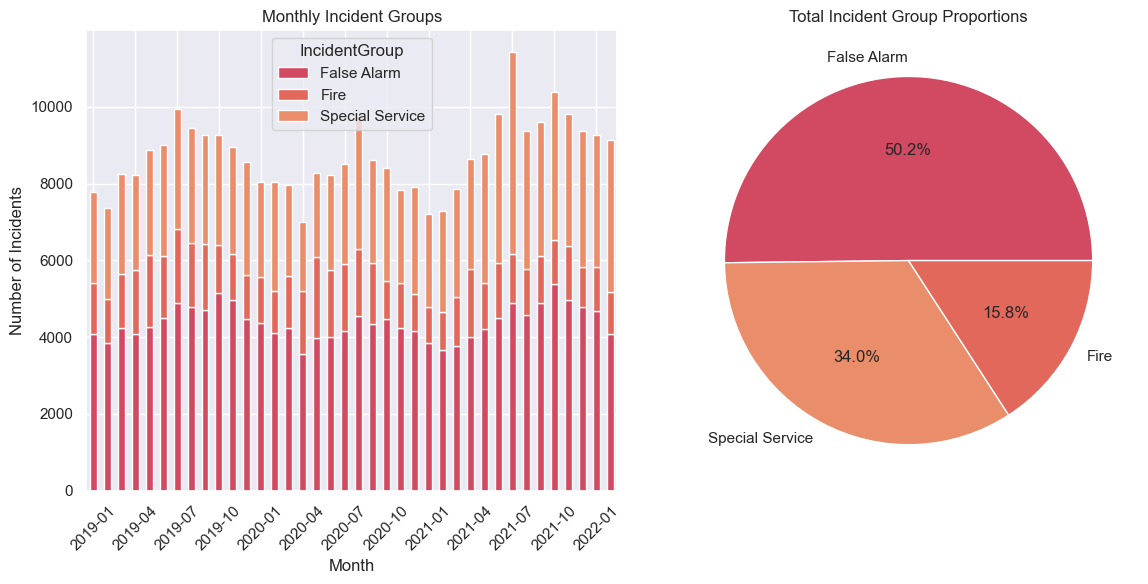

In [2]:
# Load the fires data set (created in Temp_fires_relationship.ipynb)

data_path = os.path.join(os.getcwd(), 'Data Sets')
plots_path = os.path.join(os.getcwd(), 'Plots', 'Descriptive_Analysis')
fire_data = pd.read_csv(os.path.join(data_path, 'Fire_data.csv'))

# Extract simply the date and incident group columns
dates = pd.to_datetime(fire_data['DateOfCall'])

# Create a stacked bar chart showing the incident group by month
fire_data['month'] = dates.dt.to_period('M').astype(str) # Create a new column for the month
monthly_incidents = fire_data.groupby(['month', 'IncidentGroup']).size().unstack(fill_value=0)

# Define a color mapping for the IncidentGroup categories
incident_groups = fire_data['IncidentGroup'].unique()
color_mapping = dict(zip(incident_groups, sns.color_palette("flare")))

# Create a stacked bar chart showing the incident group by month
fig = plt.figure(figsize=(12, 6))
ax1, ax2 = fig.subplots(1, 2)

monthly_incidents.plot(
    kind='bar', 
    stacked=True, 
    ax=ax1, 
    color=[color_mapping[group] for group in monthly_incidents.columns]
)
ax1.set_title('Monthly Incident Groups')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Incidents')
# Display every 3rd month
ax1.set_xticks(range(0, len(monthly_incidents.index), 3))
ax1.set_xticklabels(monthly_incidents.index[::3], rotation=45)

# Create a pie chart showing the proportion of each incident group
incident_counts = fire_data['IncidentGroup'].value_counts()
incident_counts.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    ax=ax2, 
    legend=False, 
    colors=[color_mapping[group] for group in incident_counts.index]
)
ax2.set_title('Total Incident Group Proportions')
ax2.set_ylabel('')  # Remove the y-label for the pie chart
ax2.set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.savefig(os.path.join(plots_path, 'Incident_Groups_Analysis.png'), dpi=300)
plt.show()

The graphs above show that the number of false alarms largely outweighs the number of real fires or special services. These special services often include air-lifts, animla rescues and other non-fire related call-outs, and indicates that people should be more aware of when to call-out the fire services. 

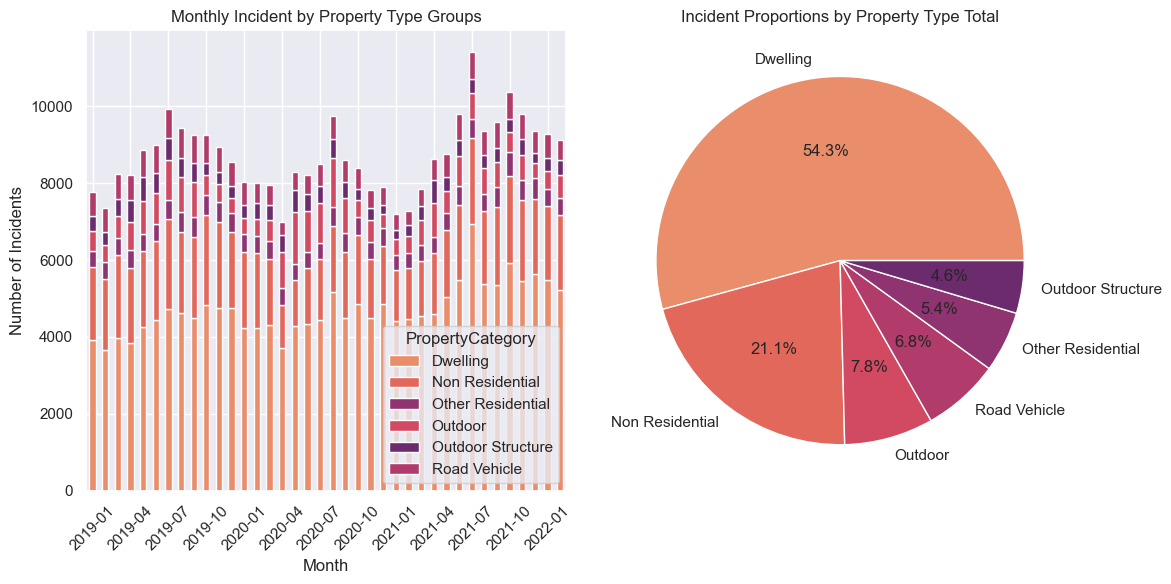

In [3]:
# Fires by property type

# Extract unique property categories
Property_cats = fire_data['PropertyCategory'].unique() # Returns the unique values
# print(len(fire_data['PropertyCategory'].unique()))
property_percentiles = fire_data['PropertyCategory'].value_counts(normalize=True) * 100

# Filter out groups with a percentile below 1%
filtered_categories = property_percentiles[property_percentiles >= 1].index

# Filter the fire_data to include only the filtered categories
filtered_fire_data = fire_data[fire_data['PropertyCategory'].isin(filtered_categories)]

# Group by monthly incidents
monthly_props = filtered_fire_data.groupby(['month', 'PropertyCategory']).size().unstack(fill_value = 0.0)

# Create color mapping
color_mapping = dict(zip(filtered_categories, sns.color_palette(palette = "flare", n_colors=len(filtered_categories))))

# Create a stacked bar chart showing the prevalence of fires by property type
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create figure and axes

monthly_props.plot(
    kind = 'bar',
    stacked = True,
    ax = ax1,
    color = [color_mapping[group] for group in monthly_props.columns]
)
ax1.set_title('Monthly Incident by Property Type Groups')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Incidents')
# Display every 3rd month
ax1.set_xticks(range(0, len(monthly_incidents.index), 3))
ax1.set_xticklabels(monthly_incidents.index[::3], rotation=45)

# Create a pie chart showing the total propertions of fires by property type
incident_count_props = filtered_fire_data['PropertyCategory'].value_counts()
incident_count_props.plot(
    kind = 'pie',
    autopct = '%1.1f%%',
    ax = ax2,
    legend = False,
    colors=[color_mapping[group] for group in incident_count_props.index]
)
ax2.set_title('Incident Proportions by Property Type Total')
ax2.set_ylabel("")
ax2.set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.savefig(os.path.join(plots_path, 'Incident_Groups_Props_Analysis.png'), dpi=300)
plt.show()

The graphs above show that the majority of fires take place in dwellings (or residential properties), and that the monthly propertions of these seem to remain the same. Further analysis could be conducted to show whether there was ever a disproportionate number of fires for a given category by modelling the proportion over a normal distribution curve and tracking the standard deviation of extreme cases from the mean.